# Heart Disease Prediction

This heart dataset is retrieved from Kaggle at https://www.kaggle.com/johnsmith88/heart-disease-dataset?select=heart.csv where it dates from 1988 and consists of four databases: Cleveland, Hungary, Switzerland, and Long Beach V.

I wanted to be able to predict `heart disease` based on the variables such as age, sex, resting blood pressure etc. using various machine learning models. In this notebook, I focused on supervised machine learning. 

Analysis done by Sydney Teo @sydteo

![Heart Disease](https://d.newsweek.com/en/full/1032264/heart-stock.jpg)

# Data Acquisition

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [4]:
data.shape

(1025, 14)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# Check for any null data
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

# Exploratory Analysis
Kaggle has provided the meaning of columns in its dataset 

In [7]:
# Rename column names for easy reference
data.columns = ['Age', 'Sex', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingElectrocardiographic', 'MaxHeartRateAchivied',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 'Thalassemia', 'Target']
data.head()

,Age,Sex,ChestPain,RestingBloodPressure,Cholestrol,FastingBloodSugar,RestingElectrocardiographic,MaxHeartRateAchivied,ExerciseIndusedAngina,Oldpeak,Slope,MajorVessels,Thalassemia,Target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


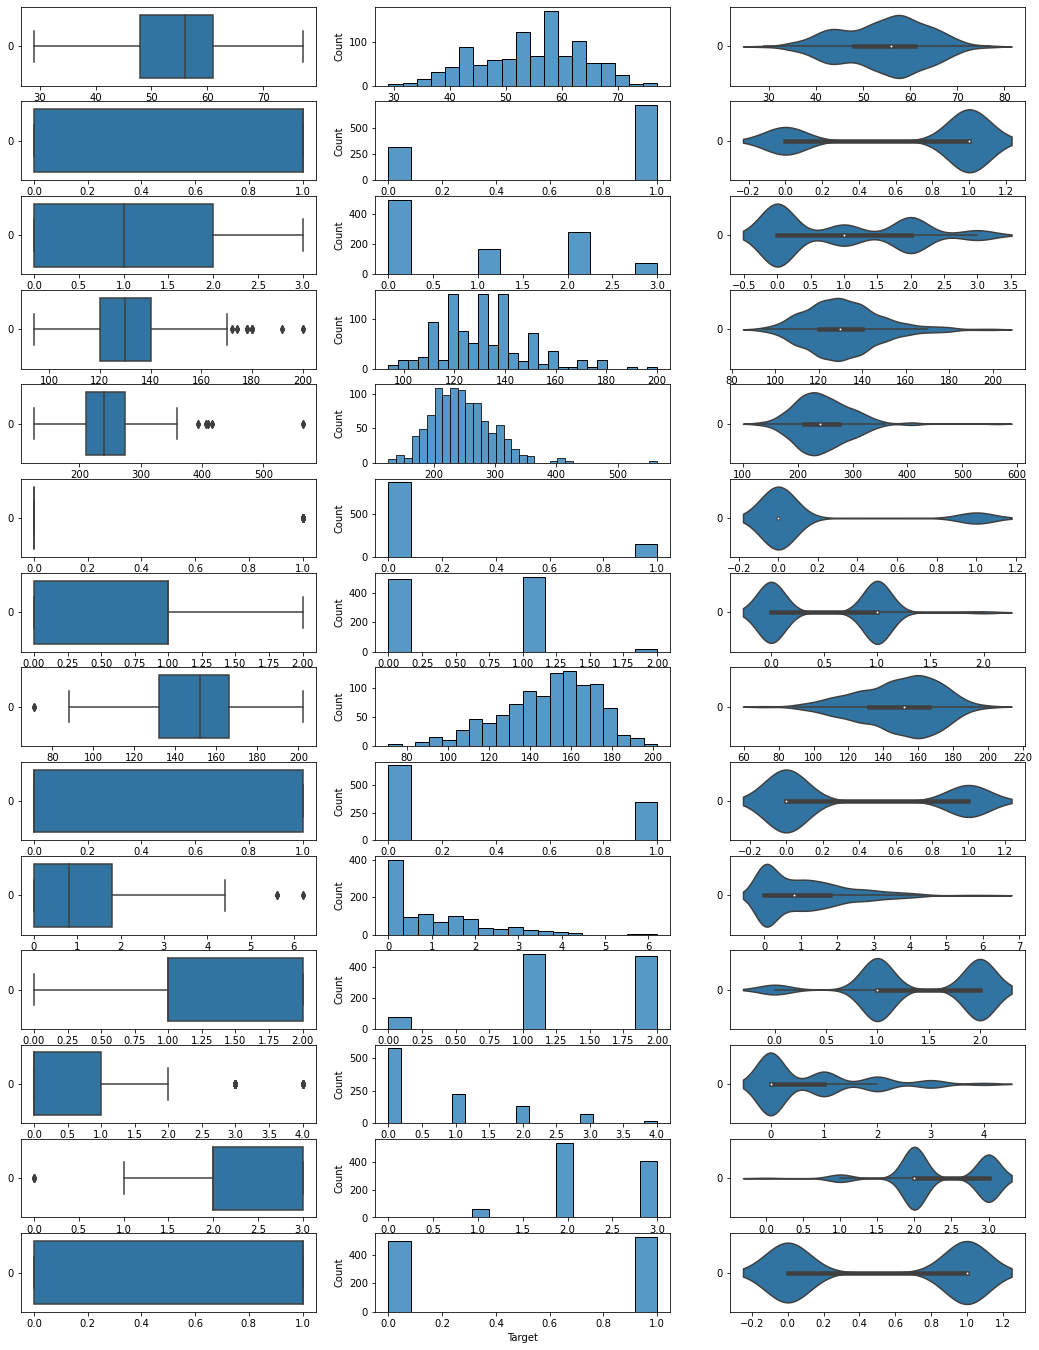

In [8]:
# Extract only the numeric data variables
numeric_data = pd.DataFrame(data[['Age', 'Sex', 'ChestPain', 'RestingBloodPressure', 'Cholestrol', 'FastingBloodSugar', 'RestingElectrocardiographic', 'MaxHeartRateAchivied',
       'ExerciseIndusedAngina', 'Oldpeak', 'Slope', 'MajorVessels', 'Thalassemia', 'Target']])

# Summary Statistics for all Variables
numeric_data.describe().round(2)

# Draw the distributions of all variables
f, axes = plt.subplots(14, 3, figsize=(18, 24))

count = 0
for var in numeric_data:
    sb.boxplot(data = numeric_data[var], orient = "h", ax = axes[count,0])
    sb.histplot(data = numeric_data[var], ax = axes[count,1])
    sb.violinplot(data = numeric_data[var], orient = "h", ax = axes[count,2])
    count += 1

                                  Age       Sex  ChestPain  \
Age                          1.000000 -0.103240  -0.071966   
Sex                         -0.103240  1.000000  -0.041119   
ChestPain                   -0.071966 -0.041119   1.000000   
RestingBloodPressure         0.271121 -0.078974   0.038177   
Cholestrol                   0.219823 -0.198258  -0.081641   
FastingBloodSugar            0.121243  0.027200   0.079294   
RestingElectrocardiographic -0.132696 -0.055117   0.043581   
MaxHeartRateAchivied        -0.390227 -0.049365   0.306839   
ExerciseIndusedAngina        0.088163  0.139157  -0.401513   
Oldpeak                      0.208137  0.084687  -0.174733   
Slope                       -0.169105 -0.026666   0.131633   
MajorVessels                 0.271551  0.111729  -0.176206   
Thalassemia                  0.072297  0.198424  -0.163341   
Target                      -0.229324 -0.279501   0.434854   

                             RestingBloodPressure  Cholestrol  \
Age 

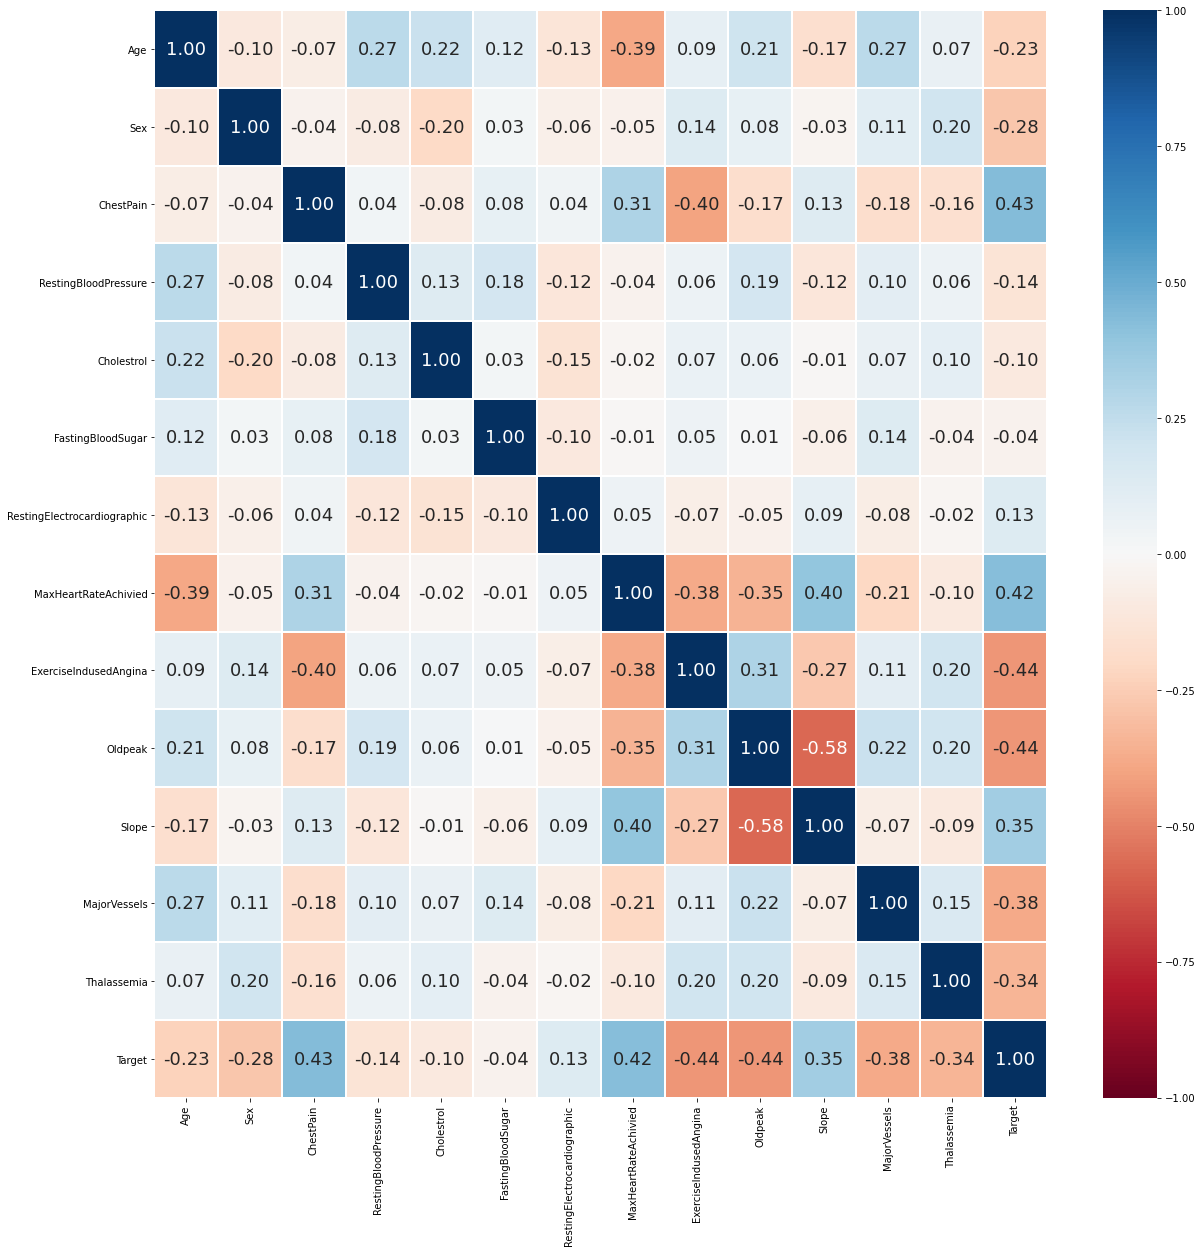

In [9]:
# Correlation Matrix
print(numeric_data.corr())

# Heatmap of the Correlation Matrix
f = plt.figure(figsize=(20, 20))
sb.heatmap(numeric_data.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")

I decided to further analyse chestpain and maxheart rate since they have greater correlation with `target` which is the variable I am interested in.

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


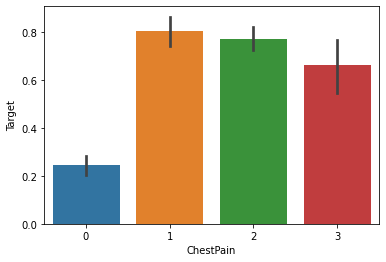

In [10]:
# Analyse chestpain feature
data["ChestPain"].unique()
sb.barplot(data["ChestPain"], data["Target"])


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


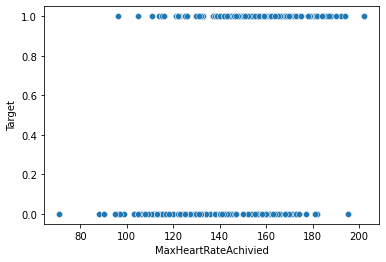

In [11]:
# Analyse MaxHeartRateAchivied against Target
data["MaxHeartRateAchivied"].unique()

sb.scatterplot(data["MaxHeartRateAchivied"], data["Target"])

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


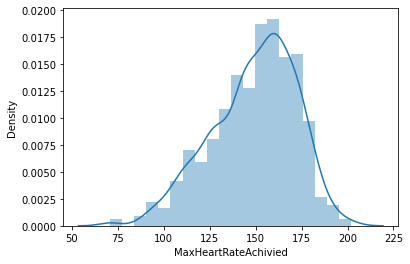

In [12]:
sb.distplot(data["MaxHeartRateAchivied"]) 

1    526
0    499
Name: Target, dtype: int64


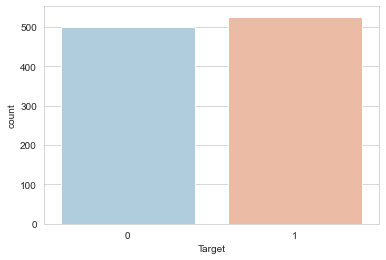

In [13]:
# Check the ratio of those with (target = 1) and without (target = 0) heart disease
sb.set_style('whitegrid')
target_temp = data.Target.value_counts()
print(target_temp)
ax = sb.countplot(x='Target', data = data, palette = 'RdBu_r')

# Data Processing
Convert cateogical variables such as to dummy variables and scale all the values before training the Machine Learning models.

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [15]:
dataset = pd.get_dummies(data, columns = ['Sex', 'ChestPain', 'FastingBloodSugar', 'RestingElectrocardiographic','ExerciseIndusedAngina','Slope','MajorVessels','Thalassemia'])

In [16]:


standardScaler = StandardScaler()
columns_to_scale = ['Age', 'RestingBloodPressure', 'Cholestrol', 'MaxHeartRateAchivied', 'Oldpeak']
dataset[columns_to_scale] = standardScaler.fit_transform(dataset[columns_to_scale])

In [17]:
dataset.head()

,Age,RestingBloodPressure,Cholestrol,MaxHeartRateAchivied,Oldpeak,Target,Sex_0,Sex_1,ChestPain_0,ChestPain_1,...,Slope_2,MajorVessels_0,MajorVessels_1,MajorVessels_2,MajorVessels_3,MajorVessels_4,Thalassemia_0,Thalassemia_1,Thalassemia_2,Thalassemia_3
0,-0.268437,-0.377636,-0.659332,0.821321,-0.060888,0,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
1,-0.158157,0.479107,-0.833861,0.255968,1.727137,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
2,1.716595,0.764688,-1.396233,-1.048692,1.301417,0,0,1,1,0,...,0,1,0,0,0,0,0,0,0,1
3,0.724079,0.936037,-0.833861,0.516900,-0.912329,0,0,1,1,0,...,1,0,1,0,0,0,0,0,0,1
4,0.834359,0.364875,0.930822,-1.874977,0.705408,0,1,0,1,0,...,0,0,0,0,1,0,0,0,1,0


# Machine Learning Models

1. Logistic Regression
2. K-Nearest Neighbour
3. Decision Tree
4. Random Forest Classifier 
5. K-Nearest Neighbour

In [18]:
# Data Splitting
from sklearn.model_selection import train_test_split

# Data Modelling from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, export_graphviz 
from sklearn.ensemble import RandomForestClassifier

# Model Fitting
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score



## Logistic Regression 
I will now use age, sex, chestpain, blood pressure, cholesterol level and max heart rate to predict whether an individual has heart disease or when `target = 1`. These variables are chosen based on their correlation as shown on heatmap

In [19]:
target = data['Target']  # Response
predictors = data.drop("Target", axis = 1) # Predictor

X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size = 0.3, random_state = 0)

# Check the sample sizes
print("Train Set :", X_train.shape, Y_train.shape)
print("Test Set  :", X_test.shape, Y_test.shape)

Train Set : (717, 13) (717,)
Test Set  : (308, 13) (308,)


In [20]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,Y_train)

Y_pred_lr = lr.predict(X_test)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [21]:
Y_pred_lr.shape

(308,)

In [22]:
score_lr = round(accuracy_score(Y_pred_lr,Y_test)*100,2)

print("Accuracy score of Logistic Regression: "+str(score_lr)+" %")

Accuracy score of Logistic Regression: 87.01 %


## K-Nearest Neighbours

In [23]:
knn_scores = []
for k in range(1, 21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    score=cross_val_score(knn_classifier, X_train, Y_train,cv = 10)
    knn_scores.append(score.mean())

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

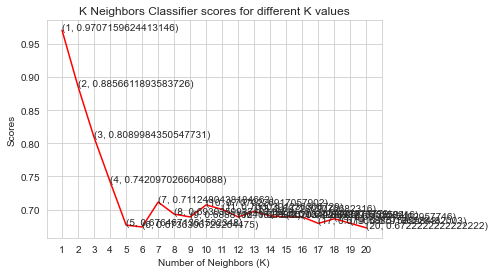

In [24]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

In [25]:
knn_classifier = KNeighborsClassifier(n_neighbors = 12)
score_knn = cross_val_score(knn_classifier, X_test, Y_test,cv = 10)

In [26]:
score_knn = score.mean() * 100

In [27]:
print("Accurcy Score of Decision Tree: " + str(score_knn) + "%")

Accurcy Score of Decision Tree: 67.22222222222221%


## Simple Decision Tree

In [28]:
# Create a Decision Tree Classifier object
dectree = DecisionTreeClassifier(max_depth = 2)

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(predictors, target, test_size = 0.4, random_state = 0)

In [30]:
max_accuracy = 0


for x in range(200):
    dt = DecisionTreeClassifier(random_state = x)
    dt.fit(X_train,Y_train)
    Y_pred_dt = dt.predict(X_test)
    current_accuracy = round(accuracy_score(Y_pred_dt,Y_test)*100, 33)
    if(current_accuracy > max_accuracy):
        max_accuracy = current_accuracy
        best_x = x
        
print(max_accuracy)
print(best_x)


dt = DecisionTreeClassifier(random_state=best_x)
dt.fit(X_train,Y_train)
Y_pred_dt = dt.predict(X_test)

97.07317073170731
3


In [31]:
print(Y_pred_dt.shape)

(410,)


In [32]:
score_dt = round(accuracy_score(Y_pred_dt,Y_test)*100,2)

print("Accurcy Score of Decision Tree: "+str(score_dt)+" %")

Accurcy Score of Decision Tree: 97.07 %


## Random Forest Model

In [33]:
rf = RandomForestClassifier()
rf.fit(X_train,Y_train)
Y_pred_rf = rf.predict(X_test)
score_rf = accuracy_score (Y_test, Y_pred_rf) * 100
print ("Accuracy Score of Random Forest Model: " + str(score_rf) + "%")



Accuracy Score of Random Forest Model: 99.26829268292683%


In [34]:
Y_pred_rf.shape

(410,)

# Conclusion

In [35]:
scores = [score_lr,score_knn,score_dt,score_rf]
algorithms = ["Logistic Regression","K-Nearest Neighbors","Decision Tree","Random Forest"]    

for i in range(len(algorithms)):
    print("The accuracy score achieved using "+algorithms[i]+" is: "+str(scores[i])+" %")

The accuracy score achieved using Logistic Regression is: 87.01 %
The accuracy score achieved using K-Nearest Neighbors is: 67.22222222222221 %
The accuracy score achieved using Decision Tree is: 97.07 %
The accuracy score achieved using Random Forest is: 99.26829268292683 %


C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


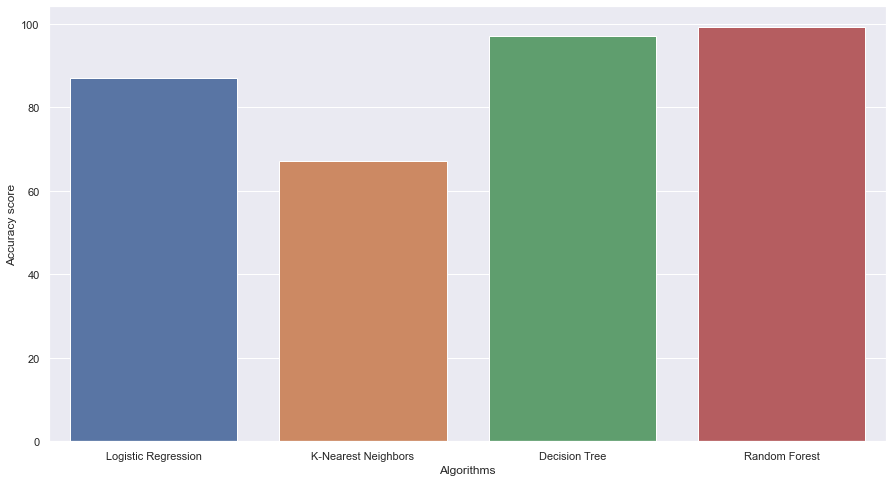

In [36]:
sb.set(rc={'figure.figsize':(15,8)})
plt.xlabel("Algorithms")
plt.ylabel("Accuracy score")

sb.barplot(algorithms,scores)

The Random Forest Algorithm has the highest accuracy score out of the others, implying that it is most reliable in predicting heart disease.